In [20]:
import pandas as pd

heart_attack_dataset = pd.read_csv('heart_attack_risk_dataset.csv')
heart_attack_dataset.tail()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate
49999,72,Male,0,0,High,30.85,0,0,191.8,142,70,0,High,Asymptomatic,Normal,0,ST-T abnormality,0,144,Moderate


### Qual a tarefa de predição?

A tarefa de predição é prever se um paciente tem risco de ataque cardíaco ou não.

### Qual o tamanho do conjunto e dados? Quantos objetos? Quantas características?

In [18]:
heart_attack_dataset.shape

(50000, 20)

### Quais são as características do conjunto de dados?

In [17]:
heart_attack_dataset.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

### Quais características são categóricas? Quais são numéricas?

Tipos de Características
Características Numéricas (7):

Age (Inteiro)

BMI (Float)

Cholesterol_Level (Float)

Resting_BP (Inteiro)

Heart_Rate (Inteiro)

Max_Heart_Rate_Achieved (Inteiro)

Características Categóricas (6):

Gender

Physical_Activity_Level (Low, Moderate, High)

Stress_Level (Low, Moderate, High)

Chest_Pain_Type (4 categorias)

Thalassemia (3 categorias)

ECG_Results (3 categorias)

Características Binárias (7):

Smoking (0/1)

Alcohol_Consumption (0/1)

Diabetes (0/1)

Hypertension (0/1)

Family_History (0/1)

Exercise_Induced_Angina (0/1)

Fasting_Blood_Sugar (0/1)

### Qual a proporção de cada classe?

In [24]:
risk_distribution = heart_attack_dataset['Heart_Attack_Risk'].value_counts(normalize=True)

print("Distribuição das Classes:")
for risk_level, proportion in risk_distribution.items():
    print(f"{risk_level}: {proportion:.1%}")

Distribuição das Classes:
Low: 50.0%
Moderate: 29.8%
High: 20.1%


### Pre Processamento

In [25]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(heart_attack_dataset.isnull().sum())

Valores ausentes por coluna:
Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64


In [26]:
from sklearn.calibration import LabelEncoder


# Variáveis para One-Hot Encoding (categorias múltiplas)
categorical_features = [
    'Physical_Activity_Level',
    'Stress_Level',
    'Chest_Pain_Type',
    'Thalassemia',
    'ECG_Results'
]

# Variáveis para Label Encoding (binárias)
binary_features = [
    'Gender',
    'Smoking',
    'Alcohol_Consumption',
    'Diabetes',
    'Hypertension',
    'Family_History',
    'Exercise_Induced_Angina',
    'Fasting_Blood_Sugar'
]

# One-Hot Encoding para variáveis categóricas
df_encoded = pd.get_dummies(heart_attack_dataset, columns=categorical_features, drop_first=True)

# Label Encoding para variáveis binárias
le = LabelEncoder()
for feature in binary_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])

df_encoded.head()


,Age,Gender,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,...,Physical_Activity_Level_Moderate,Stress_Level_Low,Stress_Level_Moderate,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,69,0,1,0,34.61,1,0,152.1,171,85,...,True,False,True,False,True,False,False,True,True,False
1,32,1,0,0,22.75,0,0,166.8,126,103,...,True,True,False,False,False,False,True,False,False,True
2,89,1,0,1,35.32,0,0,272.3,123,127,...,True,True,False,False,False,True,False,True,False,True
3,78,1,0,1,18.23,1,0,237.7,144,125,...,True,True,False,False,False,True,False,False,False,False
4,38,0,1,0,19.82,0,0,207.7,123,107,...,True,False,False,False,False,False,False,True,False,True


In [28]:
from sklearn.preprocessing import StandardScaler


numeric_features = [
    'Age',
    'BMI',
    'Cholesterol_Level',
    'Resting_BP',
    'Heart_Rate',
    'Max_Heart_Rate_Achieved'
]

# Padronização das variáveis numéricas
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

df_encoded.head()

,Age,Gender,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,...,Physical_Activity_Level_Moderate,Stress_Level_Low,Stress_Level_Moderate,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,0.750106,0,1,0,0.981390,1,0,-1.683786,1.411391,-0.472112,...,True,False,True,False,True,False,False,True,True,False
1,-1.028843,1,0,0,-0.660109,0,0,-1.344427,-0.325544,0.419555,...,True,True,False,False,False,False,True,False,False,True
2,1.711700,1,0,1,1.079658,0,0,1.091110,-0.441340,1.608443,...,True,True,False,False,False,True,False,True,False,True
3,1.182823,1,0,1,-1.285706,1,0,0.292347,0.369230,1.509369,...,True,True,False,False,False,True,False,False,False,False
4,-0.740365,0,1,0,-1.065640,0,0,-0.400223,-0.441340,0.617703,...,True,False,False,False,False,False,False,True,False,True


In [29]:
from sklearn.model_selection import train_test_split

# Codificação da variável alvo
le_target = LabelEncoder()
df_encoded['Heart_Attack_Risk'] = le_target.fit_transform(df_encoded['Heart_Attack_Risk'])


# Separar features e target
X = df_encoded.drop('Heart_Attack_Risk', axis=1)
y = df_encoded['Heart_Attack_Risk']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Verificar dimensões dos dados após pré-processamento
print("Dimensões após pré-processamento:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Verificar distribuição das classes
print("\nDistribuição das classes:")
print(pd.value_counts(y_train, normalize=True))



Dimensões após pré-processamento:
X_train: (37500, 25)
X_test: (12500, 25)

Distribuição das classes:
Heart_Attack_Risk
1    0.50048
2    0.29808
0    0.20144
Name: proportion, dtype: float64


C:\Users\Usuário\AppData\Local\Temp\ipykernel_21316\1027719585.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_train, normalize=True))


=== Métricas KNN ===

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21      2518
           1       0.50      0.63      0.55      6256
           2       0.29      0.16      0.20      3726

    accuracy                           0.40     12500
   macro avg       0.33      0.33      0.32     12500
weighted avg       0.38      0.40      0.38     12500


Matriz de Confusão KNN:

=== Métricas Regressão Logística ===

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2518
           1       0.50      1.00      0.67      6256
           2       0.00      0.00      0.00      3726

    accuracy                           0.50     12500
   macro avg       0.17      0.33      0.22     12500
weighted avg       0.25      0.50      0.33     12500


Matriz de Confusão Regressão Logística:


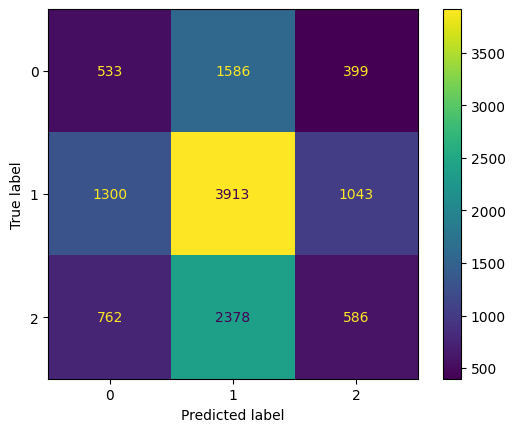

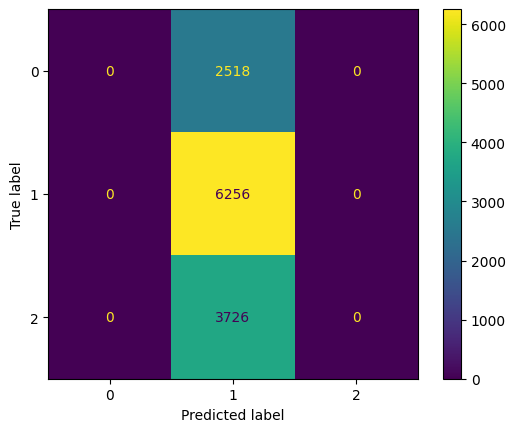

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


### Modelo 1: KNN
# Treinamento do KNN com configurações padrão
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predições
y_pred_knn = knn.predict(X_test)

# Avaliação
print("=== Métricas KNN ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Matriz de Confusão para KNN
print("\nMatriz de Confusão KNN:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

### Modelo 2: Regressão Logística
# Treinamento da Regressão Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predições
y_pred_lr = lr.predict(X_test)

# Avaliação
print("\n=== Métricas Regressão Logística ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Matriz de Confusão para Regressão Logística
print("\nMatriz de Confusão Regressão Logística:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

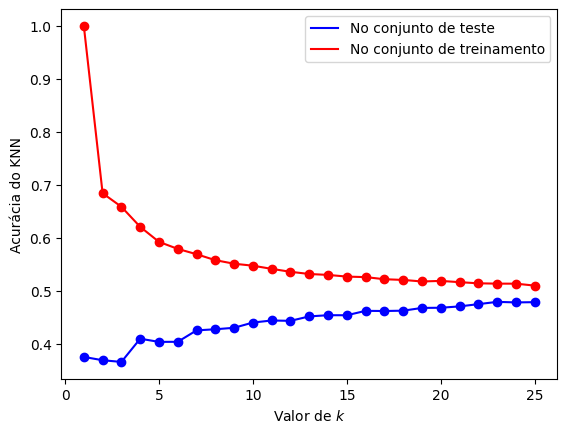

In [42]:
from sklearn import preprocessing
import matplotlib.pyplot as plt


def evaluate_knn(k, X_train, X_test, y_train, y_test):
  scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)

  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train_scaled, y_train)

  X_test_scaled = scaler.transform(X_test)
  y_pred_test = model.predict(X_test_scaled)

  y_pred_train = model.predict(X_train_scaled)

  return accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

k_values = list(range(1, 26))
acc_test, acc_train = zip(*[evaluate_knn(k, X_train, X_test, y_train, y_test) for k in k_values])

plt.scatter(k_values, acc_test, color = 'blue')
plt.plot(k_values, acc_test, color = 'blue', label = 'No conjunto de teste')
plt.scatter(k_values, acc_train, color = 'red')
plt.plot(k_values, acc_train, color = 'red', label = 'No conjunto de treinamento')
plt.xlabel(r'Valor de $k$')
plt.ylabel('Acurácia do KNN')
plt.legend(loc = 'best')

In [43]:
# Comparação das Métricas
metrics_comparison = pd.DataFrame({
    'Modelo': ['KNN', 'Regressão Logística'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), 
                accuracy_score(y_test, y_pred_lr)],
    'Macro F1-Score': [f1_score(y_test, y_pred_knn, average='macro'),
                      f1_score(y_test, y_pred_lr, average='macro')],
    'Weighted F1-Score': [f1_score(y_test, y_pred_knn, average='weighted'),
                         f1_score(y_test, y_pred_lr, average='weighted')]
})

print("\n=== Comparação dos Modelos ===")
print(metrics_comparison.to_string(index=False))


=== Comparação dos Modelos ===
             Modelo  Accuracy  Macro F1-Score  Weighted F1-Score
                KNN   0.40256        0.321971           0.379848
Regressão Logística   0.50048        0.222364           0.333867
